# 2017-11-02 Practical Data Science Meetup - Lightning Tour of Python Data Visualization

- Practical Data Science Meetup 2017-11-02
- Taylor Miller

## Load Sample Data

- We will use a sample clinical dataset from [healthcare.ai](https://healthcare.ai), an open source machine learning package designed for healthcare analysts.
    - [Python GitHub](https://github.com/HealthCatalyst/healthcareai-py)
    - [R GitHub](https://github.com/HealthCatalyst/healthcareai-r)

In [1]:
import healthcareai
import numpy as np
import pandas as pd

%matplotlib inline

diabetes = healthcareai.load_diabetes()

## One Line Data Profiling :mic_drop:

- Using the amazing [pandas_profiling](https://github.com/JosPolfliet/pandas-profiling) package.
- Install: `pip install pandas_profiling`

In [10]:
import pandas_profiling

pandas_profiling.ProfileReport(diabetes)

Number of variables,7
Number of observations,1000
Total Missing (%),0.7%
Total size in memory,54.8 KiB
Average record size in memory,56.1 B
Numeric,4
Categorical,2
Date,0
Text (Unique),0
Rejected,1
Distinct count,42


## Pandas - Exploring Relationships

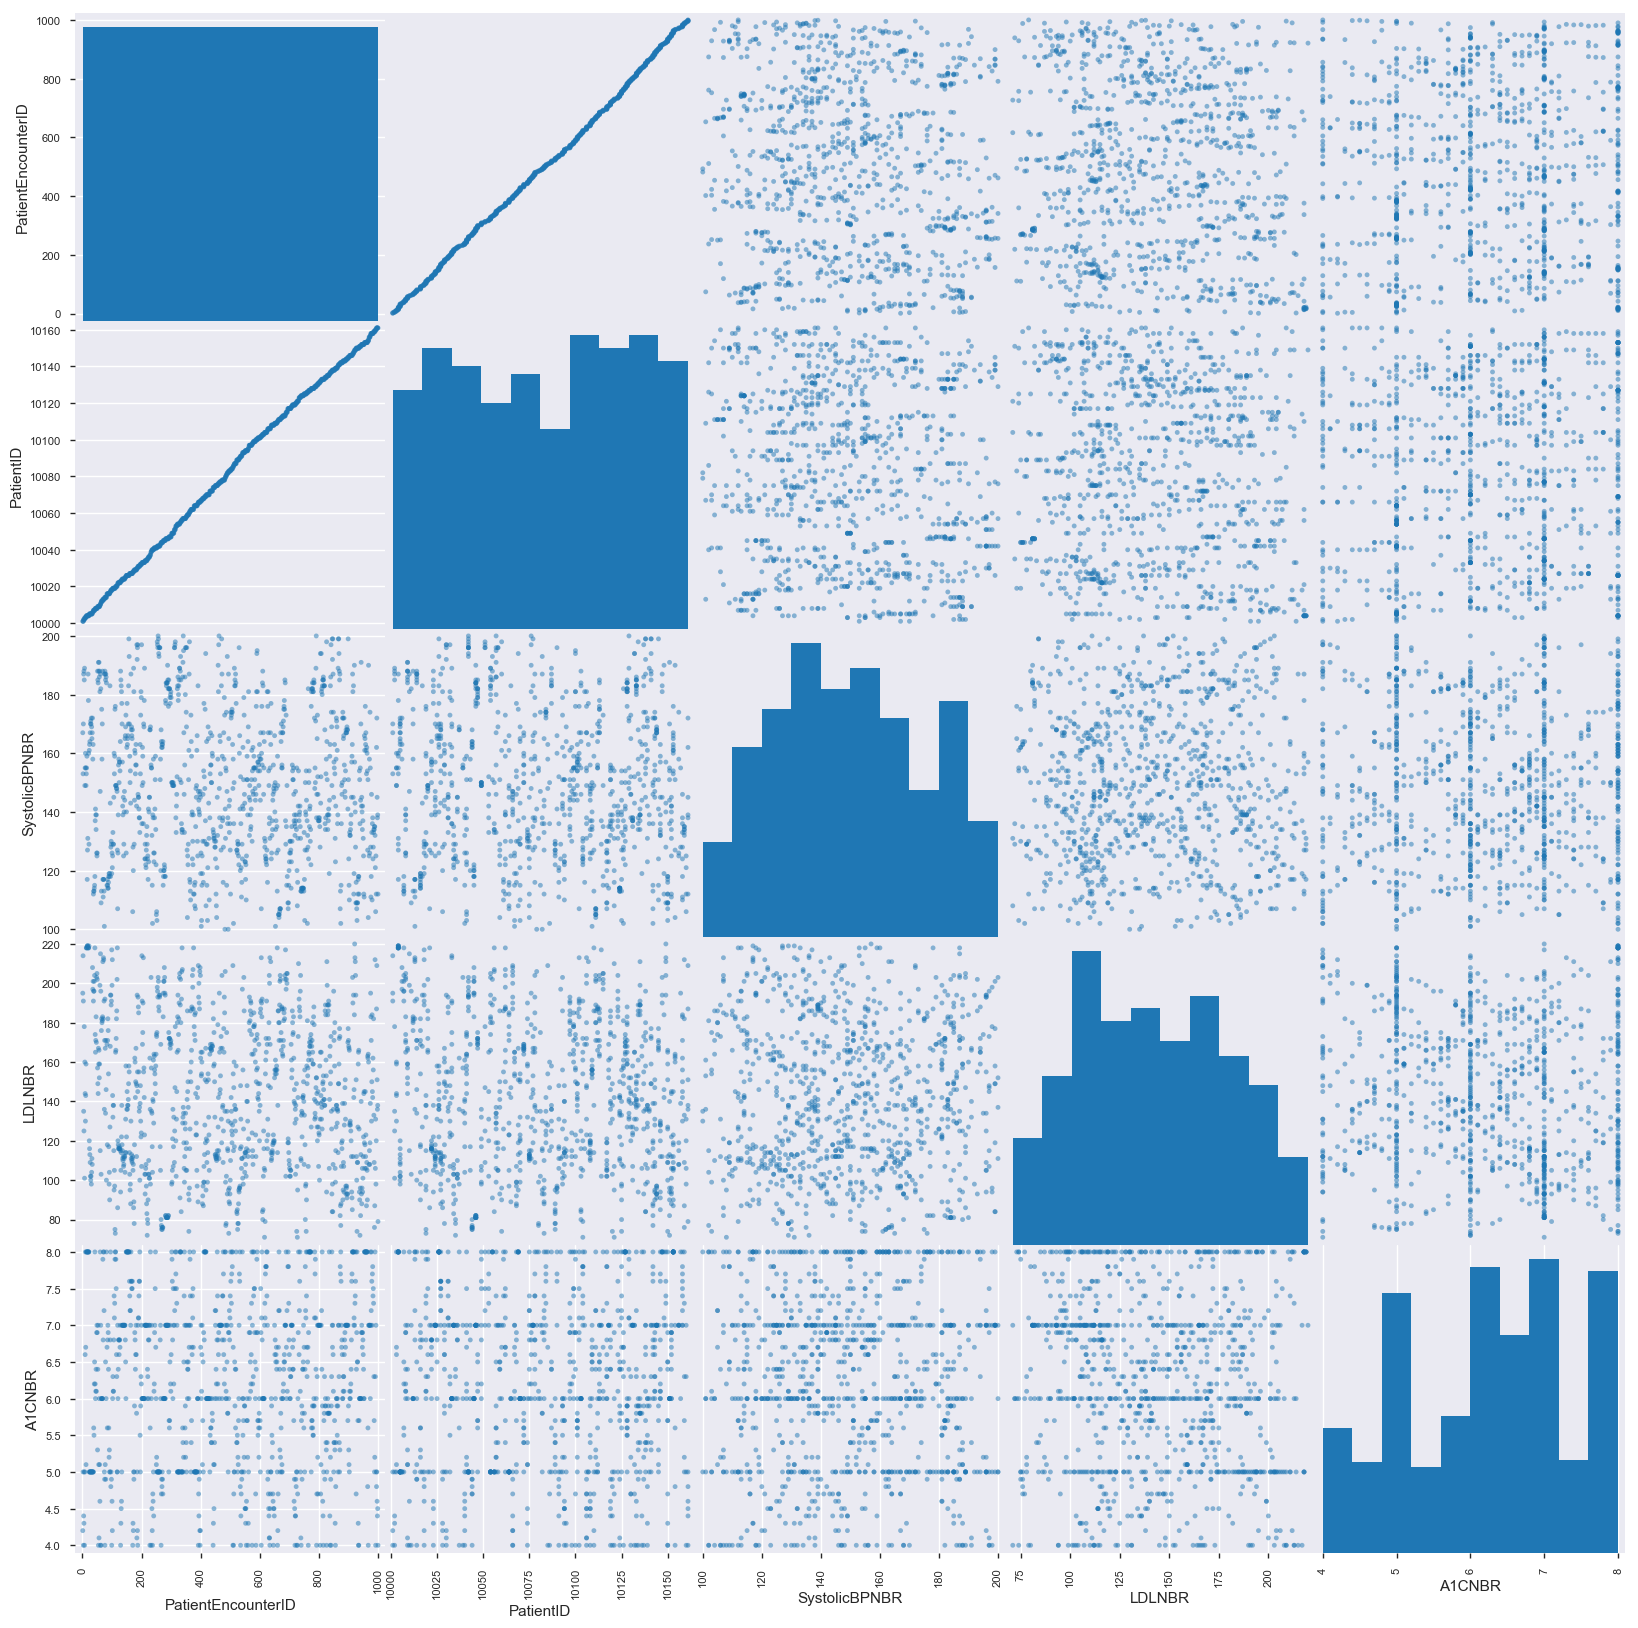

In [3]:
scatter = pd.plotting.scatter_matrix(diabetes, figsize=(20, 20))

## Seaborn: Statistical Visualizations

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

sns.set()

iris = sns.load_dataset("iris")

### Variable Relationships

#### PairPlot

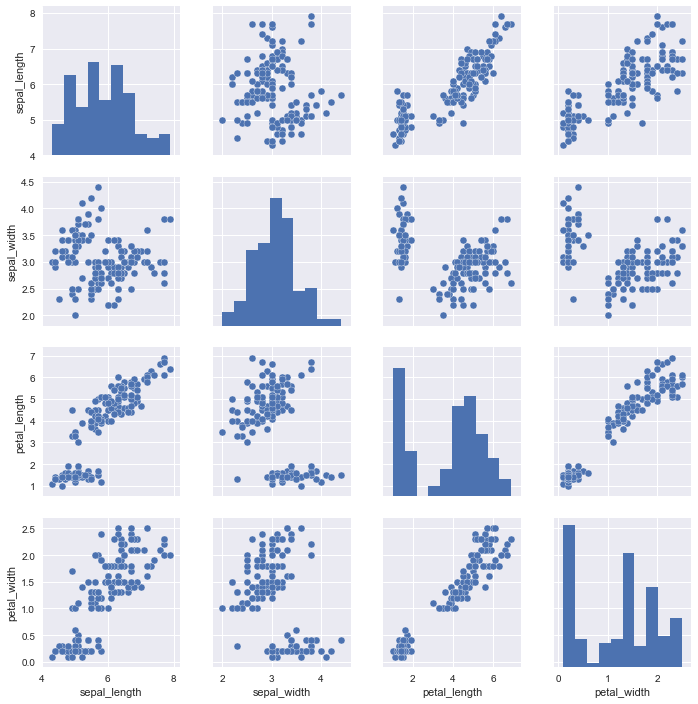

In [5]:
sns.pairplot(iris)

#### JointPlot

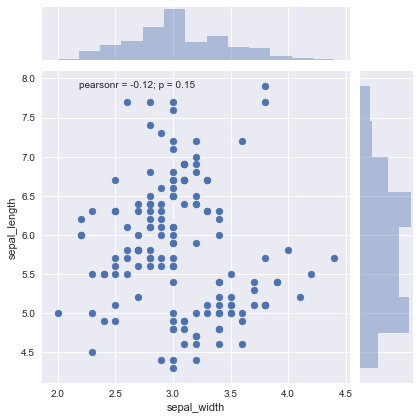

In [6]:
sns.jointplot(
    data=iris,
    x='sepal_width',
    y='sepal_length',
    size=6)

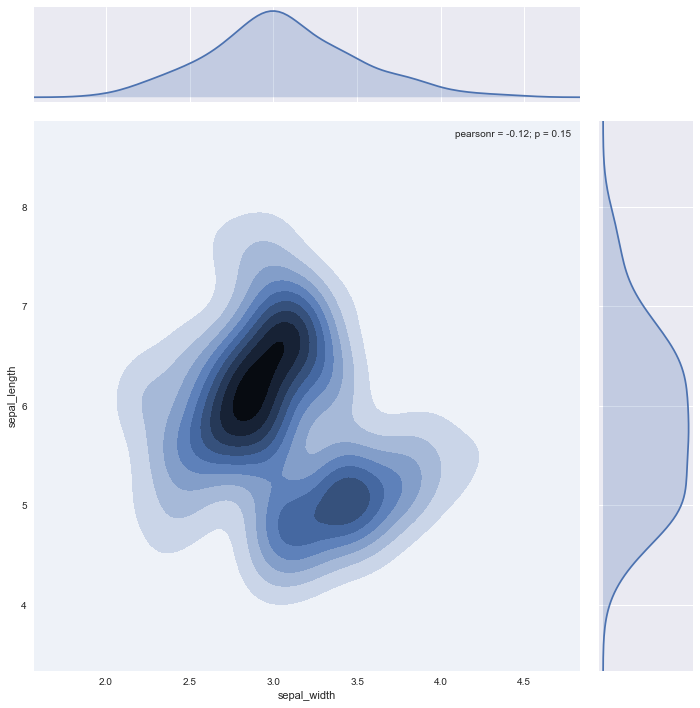

In [7]:
sns.jointplot(
    data=iris,
    x='sepal_width',
    y='sepal_length',
    size=10,
    kind='kde')

### Linear Models

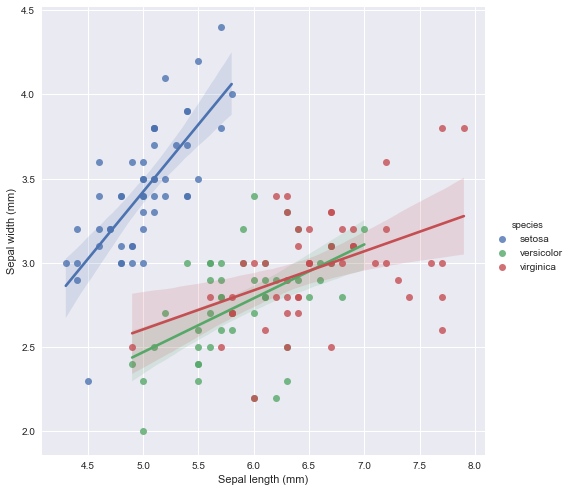

In [8]:
g = sns.lmplot(
    data=iris,
    x="sepal_length",
    y="sepal_width",
    hue="species",
    truncate=True,
    size=7)

g.set_axis_labels("Sepal length (mm)", "Sepal width (mm)")

### Categorical Variables

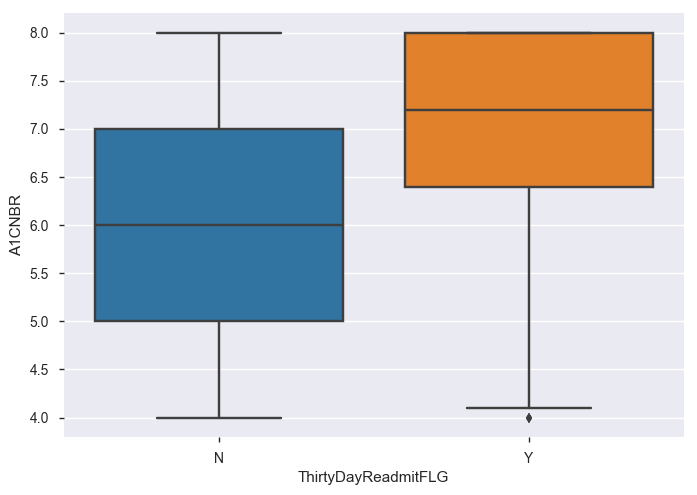

In [12]:
box = sns.boxplot(
    data=diabetes,
    x='ThirtyDayReadmitFLG',
    y='A1CNBR')

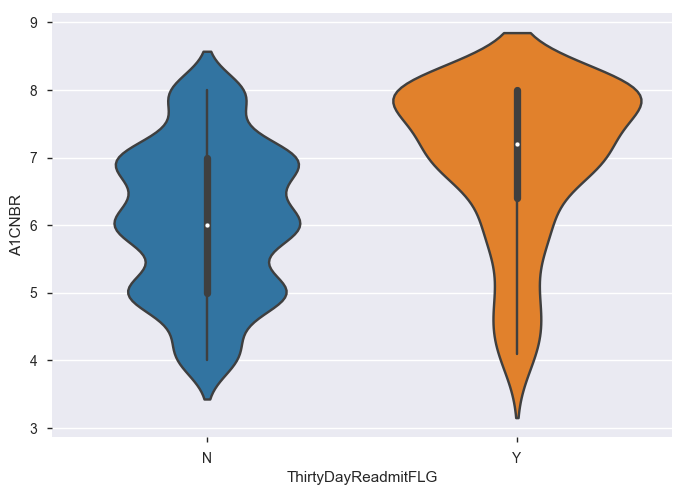

In [14]:
violin = sns.violinplot(
    data=diabetes,
    x='ThirtyDayReadmitFLG',
    y='A1CNBR')

#### Factors Across Groups

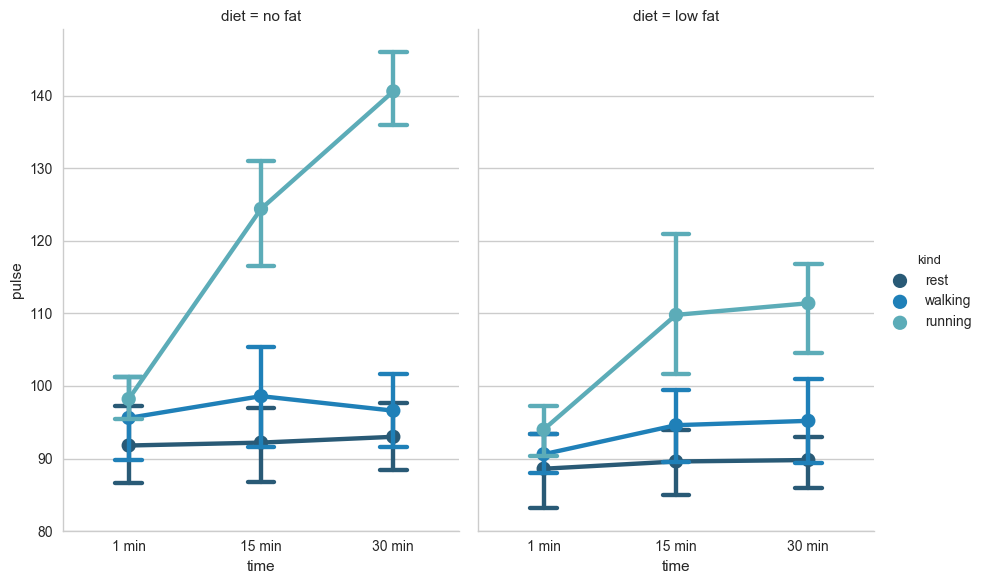

In [15]:
sns.set(style="whitegrid")

g = sns.factorplot(x="time", y="pulse", hue="kind", col="diet", data=sns.load_dataset("exercise"),
                   capsize=.2, palette="YlGnBu_d", size=6, aspect=.75)


## Yellowbrick

Yellowbrick is a suite of visual diagnostic tools called “Visualizers” that extend the Scikit-Learn API to allow human steering of the model selection process.

- The delightful [yellowbrick](http://www.scikit-yb.org/) library.
- Install: `pip install yellowbrick`
- Conforms to familiar scikit-learn API

### Feature Relationships

**Note for this to work, you'll need to download the example csv here:**

[Download zipped dataset](https://s3.amazonaws.com/ddl-data-lake/yellowbrick/bikeshare.zip)

[About the dataset](http://www.scikit-yb.org/en/latest/quickstart.html#walkthrough)

In [21]:
data = pd.read_csv('bikeshare.csv')
X = data[[
    "season", "month", "hour", "holiday", "weekday", "workingday",
    "weather", "temp", "feelslike", "humidity", "windspeed"
]]
y = data["riders"]

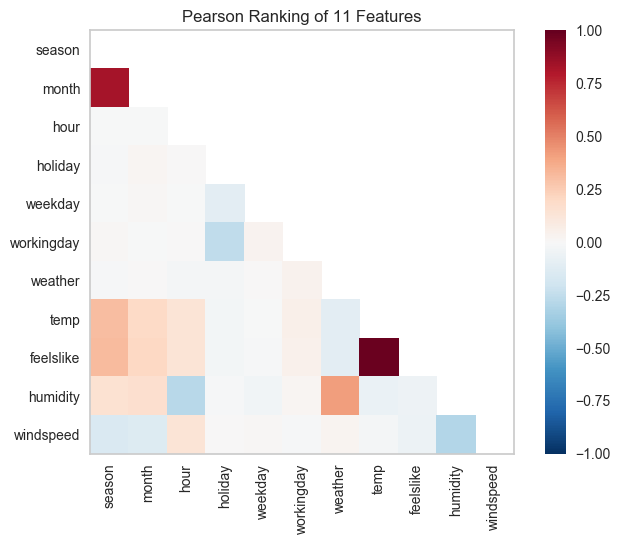

In [22]:
from yellowbrick.features import Rank2D, ParallelCoordinates

visualizer = Rank2D(algorithm="pearson")
visualizer.fit_transform(X)
visualizer.poof()